In [2]:
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import sklearn.cluster as skcluster
# import seaborn as sns


In [13]:

# responsibility (E[z_{nk}])
def rho(x, phi, pi):
    N, I = x.shape
    K, = pi.shape
    Z = np.zeros((N,K))
    for i in range(I):
        for n in range(N):
            X = np.sum(np.log(x[n])*phi[k])
            X = X - np.min(X, axis=1)
            Z[n,k] = pi[k]*np.exp(X)
    Z = (Z.T/np.sum(Z, axis=1)).T
    return Z
    
def update(x, phi, pi):
    # E-step
    r = rho(x, phi, pi)
    # M-step
    omega = np.sum(r, axis=0)
    psi = X.T.dot(r)
    new_phi = psi/np.sum(psi, axis=0)
    new_pi = omega/np.sum(omega)
    return new_phi, new_pi

def init_multinomial(x, K):
    skcluster.KMeans(K, )
    N, I = x.shape
    return np.zeros((N,K)), np.zeros(K)

def EM(X, k):
    threshold = 1e-5
    phi, pi = init_multinomial(X, k)
    while True:
        new_phi, new_pi = update(X, phi, pi)
        if np.sum(new_phi-phi)<threshold and np.sum(new_pi-pi)<threshold:
            break
        phi, pi = new_phi, new_pi
    return phi, pi

    
    

In [13]:
np.array(((x,y) for x in range(10)) for y in range(10)).T

array(<generator object <genexpr> at 0x10b587888>, dtype=object)

In [374]:
file = open('data/docword.nips.txt', 'r')
D,W,NNZ = (int(file.readline().strip()) for i in range(3))
X = np.zeros([D,W])
for line in file:
    n,i,w = tuple(map(int, line.strip().split(' ')))
    X[n-1,i-1] = w


In [380]:
phi, pi = EM(X, 10, E_multi, M_multi, init_multi, dis=False)

FloatingPointError: divide by zero encountered in log

In [9]:
clusters = skcluster.KMeans(n_clusters=10).fit(X)

In [344]:
from PIL import Image
from matplotlib.pyplot import imshow, figure
%matplotlib inline

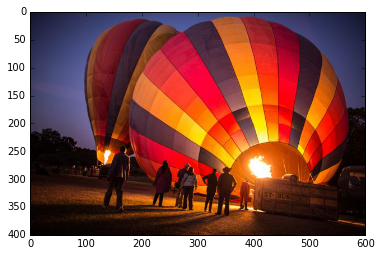

In [348]:
im = Image.open('test_images/balloons.jpg')
imshow(im)

In [385]:
data = np.asarray(im, dtype=np.float64)
H,W,_ = data.shape
data = (data/256).reshape(H*W, 3)
print(H, W)

400 600


In [386]:
def display(x, theta, shape):
    N,I = x.shape
    pi, mu = theta
    K = pi.size
    w = -0.5*(np.ones((K,I)).dot((x*x).T)-2*(mu.dot(x.T))+(mu*mu).dot(np.ones((I,N))))
    pos = np.argmax(w, axis=0).reshape(N)
    figure()
    imshow(pos.reshape(shape))
    
def init_normal(x, K):
    clusters = skcluster.KMeans(n_clusters=K)
    clusters.fit(x)
    pi = np.bincount(clusters.predict(data))
    mu = clusters.cluster_centers_    
    pi.resize(K)
    pi = (pi/np.sum(pi))*0.9+(0.1/K)
#     mu = x[np.random.randint(0,x.shape[1],K)]
#     pi = np.ones(K)/K
#     print(mu)
    return (pi, mu)

#     w = np.zeros((K,N))
#     for k in range(K):
#         for n in range(N):
#             diff = x[n]-mu[k]
#             w[k,n] = -0.5*(diff.dot(diff))+np.log(pi[k])
def E_normal(x, theta):
    pi, mu = theta
    N, I = x.shape
    K = pi.size
    w = -0.5*(np.ones((K,I)).dot((x*x).T)-2*(mu.dot(x.T))+(mu*mu).dot(np.ones((I,N))))
    w += +np.log(pi).reshape((-1,1))
    w -= sp.misc.logsumexp(w, axis=0)
    w = np.exp(w)
    return w

def M_normal(x, w):
    W = np.sum(w, axis=1).reshape((-1, 1))
    N = x.shape[0]
    mu = w.dot(x) / W
    pi = W / N
    return (pi, mu)
    
def EM(X, k, Estep, Mstep, Init, shape=(0,0), dis=True):
    theta = Init(X, k)
    if dis:
        display(X, theta, shape)
    for i in range(40):
#         print("iteration %i"%i)
        e = Estep(X, theta)
        theta = Mstep(X, e)
    if dis:
        display(X, theta, shape)
    return theta

In [ ]:
np.seterr(all='warn')
np.set_printoptions(precision=3)

pi, mu = EM(data*40, 50, E_normal, M_normal, init_normal, (H,W))

In [389]:
# def init_multi(x, K):
#     clusters = skcluster.KMeans(n_clusters=K)
#     clusters.fit(x)
#     pi = np.bincount(clusters.predict(x))
#     phi = clusters.cluster_centers_    
#     pi.resize(K)
#     pi = (pi/np.sum(pi))*0.9+(0.1/K)
#     phi = phi*0.9+(0.1*np.sum(phi,axis=1).reshape(-1,1)/phi.shape[1])
#     return (pi, phi)

#     for k in range(K):
#         for n in range(N):
#             w[k, n] = phi[k].dot(np.log(x[n]))+np.log(pi[k])
def E_multi(x, theta):
    pi, phi = theta
    N, I = x.shape
    K = pi.size
    w = np.log(phi).dot(x.T)+np.log(pi).reshape((-1,1))
    w = w-sp.misc.logsumexp(w, axis=0)
    w = np.exp(w)
    return w

def M_multi(x, w):
    W = np.sum(w, axis=1).reshape((-1, 1))
    N = x.shape[0]
    phi = w.dot(x) / W
    pi = W / N
    return (pi, phi)


phi, pi = EM(X, 10, E_multi, M_multi, init_multi, dis=False)

/usr/local/lib/python3.5/site-packages/scipy/misc/common.py:139: RuntimeWarning: underflow encountered in exp
  tmp = exp(a - a_max)
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: underflow encountered in exp
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: underflow encountered in true_divide
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log


In [337]:
x = data.copy()*20
K = 5
N,I = x.shape
w = -0.5*(np.ones((K,I)).dot((x*x).T)-2*(mu.dot(x.T))+(mu*mu).dot(np.ones((I,N))))
# w += np.log(pi).reshape((-1,1))
pos = np.argmax(w, axis=0).reshape(N)

np.sum(pos!=1)

167194

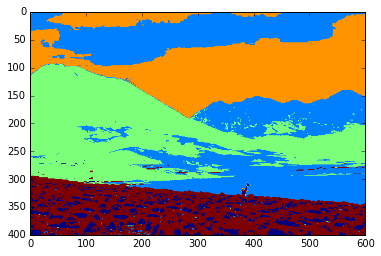

In [338]:
# clusters = skcluster.KMeans(n_clusters=20).fit(data)
# print(clusters.cluster_centers_)
imshow(pos.reshape((H,W)))


In [336]:
clusters.cluster_centers_*20

array([[ 13.739,  12.476,  12.072],
       [ 17.375,  17.86 ,  18.329],
       [ 10.686,   6.739,   2.777],
       [  7.312,   8.951,  12.079],
       [ 14.124,  15.285,  16.531],
       [ 12.831,   9.388,   6.497],
       [  5.597,   6.595,   8.691],
       [  9.033,  10.205,  12.731],
       [ 15.593,  16.248,  17.295],
       [  3.654,   1.487,   0.451],
       [  9.813,   9.305,  10.095],
       [ 18.909,  19.073,  19.094],
       [ 13.495,   8.838,   3.248],
       [ 10.33 ,  12.006,  14.703],
       [ 15.204,  10.777,   4.764],
       [  7.615,   4.254,   1.312],
       [ 11.811,  11.005,  11.365],
       [  6.366,   7.957,  10.831],
       [ 12.036,  13.339,  15.48 ],
       [ 15.048,  11.546,   8.139]])

In [391]:
phi

array([[ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan]])